## Web Scraping Notebook ##
This notebook scrapes the data of Kic

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import zipfile
import re


In [10]:
data = pd.read_csv("DSI_kickstarterscrape_dataset (1).csv")
data.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [12]:
data.shape

(45957, 17)

In [16]:
data.isnull().sum()

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

In [21]:


# URL of the Kickstarter datasets page
page_url = "https://webrobots.io/kickstarter-datasets/"


headers = {"User-Agent": "Mozilla/5.0"}  
response = requests.get(page_url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find all links that contain ".json"
    json_links = [a['href'] for a in soup.find_all("a", href=True) if a['href'].endswith(".json")]

    if json_links:
        os.makedirs("kickstarter_jsons", exist_ok=True)  # Create folder if not exists
        
        for link in json_links:
            filename = link.split("/")[-1]  # Extract filename from URL
            json_url = link if link.startswith("http") else requests.compat.urljoin(page_url, link)
            
            print(f"Downloading: {json_url}")

            # Download JSON file
            json_response = requests.get(json_url, headers=headers)
            if json_response.status_code == 200:
                file_path = os.path.join("kickstarter_jsons", filename)
                with open(file_path, "wb") as f:
                    f.write(json_response.content)
                print(f"Saved: {file_path}")
            else:
                print(f"Failed to download {json_url} - Status code:", json_response.status_code)
    else:
        print("No JSON links found on the page.")
else:
    print("Failed to load the webpage:", response.status_code)


No JSON links found on the page.


In [31]:



options = Options()
options.add_experimental_option("detach", True)  # Keeps browser open (optional)
options.add_argument("--headless")  # Runs Chrome in headless mode (remove if you want to see the browser)


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Open the Kickstarter datasets page
driver.get("https://webrobots.io/kickstarter-datasets/")

# Wait for JavaScript to load content
time.sleep(5)  # Increase if the page loads slowly

# Find all JSON download links (modify selector if needed)
links = driver.find_elements(By.XPATH, '//a[contains(text(), "Kickstarter") and contains(@href, ".json")]')

if links:
    print(f"Found {len(links)} JSON files. Downloading...")

    for link in links:
        json_url = link.get_attribute("href")
        print(f"Downloading: {json_url}")

        # Open JSON URL in a new tab (triggers download)
        driver.execute_script(f"window.open('{json_url}', '_blank');")
        time.sleep(2)  # Allow time for download to start

    print("All JSON files should start downloading in Chrome's default folder.")
else:
    print("No JSON links found on the page.")

driver.quit()


No JSON links found on the page.


In [25]:
!pip install selenium

  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 248.3 kB/s eta 0:00:0000:0100:02
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 0.58.0
    Uninstalling websocket-client-0.58.0:
      Successfully uninstalled websocket-client-0.58.0
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [29]:
!pip install webdriver_manager

In [33]:


# Configure Selenium WebDriver
options = Options()
options.add_experimental_option("detach", True)  # Keeps browser open
options.add_argument("--headless")  # Remove if you want to see the browser
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920x1080")


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Open the Kickstarter datasets page
driver.get("https://webrobots.io/kickstarter-datasets/")
time.sleep(5)  # Wait for the page to load completely


driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

# Locate all download links/buttons
links = driver.find_elements(By.XPATH, '//a[contains(text(), "Kickstarter") and contains(@href, ".json")]')

if links:
    print(f"Found {len(links)} JSON files. Downloading...")

    for link in links:
        json_url = link.get_attribute("href")
        print(f"Downloading: {json_url}")

        # Open JSON URL in a new tab (triggers download)
        driver.execute_script(f"window.open('{json_url}', '_blank');")
        time.sleep(2)  # Allow time for download to start

    print("All JSON files should start downloading in Chrome's default folder.")
else:
    print("No JSON links found. The page might be using JavaScript to generate links dynamically.")

driver.quit()


No JSON links found. The page might be using JavaScript to generate links dynamically.


In [37]:


# URL of the Kickstarter datasets page
page_url = "https://webrobots.io/kickstarter-datasets/"

# Fetch the webpage content
headers = {"User-Agent": "Mozilla/5.0"}  # Mimic a real browser
response = requests.get(page_url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find all Kickstarter CSV (ZIP) download links that contain "2024"
    csv_links = [
        a['href'] for a in soup.find_all("a", href=True) 
        if "Kickstarter" in a['href'] and "2024" in a['href'] and a['href'].endswith(".zip")
    ]

    if csv_links:
        os.makedirs("kickstarter_csvs_2024", exist_ok=True)  # Create folder if not exists
        
        for link in csv_links:
            filename = link.split("/")[-1]  # Extract filename from URL
            csv_url = link if link.startswith("http") else requests.compat.urljoin(page_url, link)
            
            print(f"Downloading: {csv_url}")

            # Download CSV file
            csv_response = requests.get(csv_url, headers=headers, stream=True)
            if csv_response.status_code == 200:
                file_path = os.path.join("kickstarter_csvs_2024", filename)
                with open(file_path, "wb") as f:
                    for chunk in csv_response.iter_content(chunk_size=8192):
                        f.write(chunk)
                print(f"Saved: {file_path}")
            else:
                print(f"Failed to download {csv_url} - Status code:", csv_response.status_code)
    else:
        print("No 2024 CSV links found on the page.")
else:
    print("Failed to load the webpage:", response.status_code)


Downloading: https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-12-12T03_20_04_455Z.zip
Saved: kickstarter_csvs_2024/Kickstarter_2024-12-12T03_20_04_455Z.zip
Downloading: https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-11-14T03_20_15_937Z.zip
Saved: kickstarter_csvs_2024/Kickstarter_2024-11-14T03_20_15_937Z.zip
Downloading: https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-10-14T06_34_06_986Z.zip
Saved: kickstarter_csvs_2024/Kickstarter_2024-10-14T06_34_06_986Z.zip
Downloading: https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-09-12T03_20_25_588Z.zip
Saved: kickstarter_csvs_2024/Kickstarter_2024-09-12T03_20_25_588Z.zip
Downloading: https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-08-12T12_06_51_507Z.zip
Saved: kickstarter_csvs_2024/Kickstarter_2024-08-12T12_06_51_507Z.zip
Downloading: https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2024-07-11T03_20_11_021Z.zip
Saved: kickstarter_c

In [67]:



zip_folder = "kickstarter_csvs_2024"

# List to store individual DataFrames
dataframes = []

# Loop through each ZIP file in the folder
for zip_file in os.listdir(zip_folder):
    if zip_file.endswith(".zip"):  # Only process ZIP files
        zip_path = os.path.join(zip_folder, zip_file)
        
        # Extract month from ZIP filename using regex (assumes format includes YYYY-MM)
        match = re.search(r"(\d{4}-\d{2})", zip_file)
        month = match.group(1) if match else "Unknown"

        # Open the ZIP file
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            # Extract and read CSV files
            for file in zip_ref.namelist():
                if file.endswith(".csv"):  # Only process CSV files
                    with zip_ref.open(file) as csv_file:
                        df = pd.read_csv(csv_file, low_memory=False)  # Load CSV into DataFrame
                        df["source_file"] = file  # Add original filename column
                        df["month"] = month  # Add month column
                        dataframes.append(df)  # Store DataFrame in list
                    print(f"Loaded: {file} (Month: {month})")

# Combine all CSV DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the DataFrame
import ace_tools as tools
tools.display_dataframe_to_user(name="Kickstarter Data (2024) with Months", dataframe=combined_df)


Loaded: Kickstarter.csv (Month: 2024-01)
Loaded: Kickstarter001.csv (Month: 2024-01)
Loaded: Kickstarter002.csv (Month: 2024-01)
Loaded: Kickstarter003.csv (Month: 2024-01)
Loaded: Kickstarter004.csv (Month: 2024-01)
Loaded: Kickstarter005.csv (Month: 2024-01)
Loaded: Kickstarter006.csv (Month: 2024-01)
Loaded: Kickstarter007.csv (Month: 2024-01)
Loaded: Kickstarter.csv (Month: 2024-11)
Loaded: Kickstarter001.csv (Month: 2024-11)
Loaded: Kickstarter002.csv (Month: 2024-11)
Loaded: Kickstarter003.csv (Month: 2024-11)
Loaded: Kickstarter004.csv (Month: 2024-11)
Loaded: Kickstarter005.csv (Month: 2024-11)
Loaded: Kickstarter006.csv (Month: 2024-11)
Loaded: Kickstarter007.csv (Month: 2024-11)
Loaded: Kickstarter008.csv (Month: 2024-11)
Loaded: Kickstarter009.csv (Month: 2024-11)
Loaded: Kickstarter010.csv (Month: 2024-11)
Loaded: Kickstarter011.csv (Month: 2024-11)
Loaded: Kickstarter012.csv (Month: 2024-11)
Loaded: Kickstarter013.csv (Month: 2024-11)
Loaded: Kickstarter014.csv (Month: 202

ModuleNotFoundError: No module named 'ace_tools'

In [41]:
!pip install ace_tools

In [69]:
combined_df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,video,source_file,month,is_in_post_campaign_pledging_phase
0,2,Astrological Connections and Personal Wisdom,"{""id"":260,""name"":""Interactive Design"",""analyti...",51.0,US,the United States,1703817326,"{""id"":1796521275,""name"":""Jusmari"",""slug"":""jusm...",USD,$,...,1705105011,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,51.0,domestic,NaN,Kickstarter.csv,2024-01,NaN
1,1,Cozy Kornerz is a fun new redecorating tool th...,"{""id"":260,""name"":""Interactive Design"",""analyti...",1.0,US,the United States,1703207262,"{""id"":427490455,""name"":""Anna-Marie Haynes"",""is...",USD,$,...,1705094168,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,1.0,domestic,"{""id"":1265706,""status"":""successful"",""hls"":""htt...",Kickstarter.csv,2024-01,NaN
2,1,I want to design an exercise Matt with practic...,"{""id"":260,""name"":""Interactive Design"",""analyti...",1.0,US,the United States,1595795908,"{""id"":80814941,""name"":""Milad Nazar"",""slug"":""mi...",USD,$,...,1704922607,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,1.0,domestic,NaN,Kickstarter.csv,2024-01,NaN
3,0,A space engineered to promote informed consume...,"{""id"":260,""name"":""Interactive Design"",""analyti...",NaN,AU,Australia,1701838739,"{""id"":1244321122,""name"":""Sebastian Cincotta"",""...",AUD,$,...,1702221670,0.0,"{""web"":{""project"":""https://www.kickstarter.com...",NaN,NaN,domestic,NaN,Kickstarter.csv,2024-01,NaN
4,0,YourMD Online Connect: Redefining Telehealth f...,"{""id"":260,""name"":""Interactive Design"",""analyti...",NaN,US,the United States,1684808241,"{""id"":247411242,""name"":""Teja V Surapaneni MD, ...",USD,$,...,1684893892,0.0,"{""web"":{""project"":""https://www.kickstarter.com...",NaN,NaN,domestic,NaN,Kickstarter.csv,2024-01,NaN


In [128]:
combined_df['blurb']

blurb
Artistic nudes and boudoir of professional and amateur models: Digital photos, Softbook and eBook.                                         294
A beautiful natural Fine art nude book exemplifying the female form presented by female producer Nina Vain.                                252
LA VOZ debe seguir oyéndose porque es un programa caracterizado por la independencia, la veracidad y la defensa de la libertad.            184
Women who wear mask to express their inner feelings and desires.                                                                           180
Im creating custom , funny gag gifts that are great for the person who has everything , hard to buy for or just for Laughs !!              153
                                                                                                                                          ... 
A film following the life of an Ironman, his journey to World Championships, and everything that entails both physically and mentally.  

<Axes: ylabel='Frequency'>

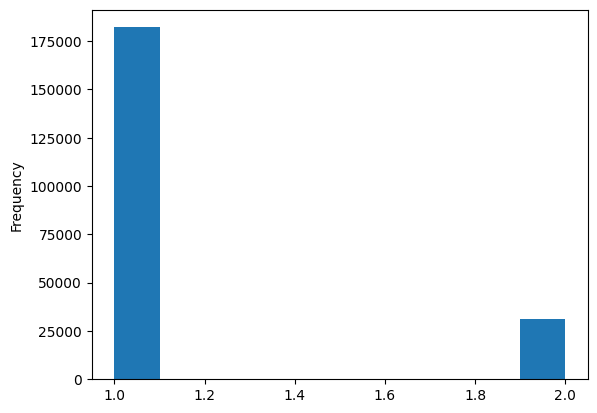

In [181]:
combined_df[combined_df["month"]=='2024-11'][['id','blurb']].id.value_counts().plot(kind='hist')

In [205]:
combined_df[combined_df['id']==552175460]

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,video,source_file,month,is_in_post_campaign_pledging_phase
175912,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,domestic,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter046.csv,2024-11,NaN
239773,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,domestic,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter066.csv,2024-11,NaN
406113,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,international,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter032.csv,2024-04,NaN
436658,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,international,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter042.csv,2024-04,NaN
539503,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,domestic,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter.csv,2024-07,NaN
721460,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,domestic,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter055.csv,2024-07,NaN
1006785,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,domestic,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter070.csv,2024-12,NaN
1077176,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.kickstarter.com...",1.263751,57710.571214,domestic,"{""id"":1262374,""status"":""successful"",""hls"":""htt...",Kickstarter019.csv,2024-06,NaN
1085992,874,A documentary on how the Amiga 500 Computer sa...,"{""id"":30,""name"":""Documentary"",""analytics_name""...",57365.0,GB,the United Kingdom,1700572539,"{""id"":1195082866,""name"":""Nicola Caulfield & An...",GBP,£,...,1702560120,1.271354,"{""web"":{""project"":""https://www.

In [170]:
combined_df['category'][0]

'{"id":260,"name":"Interactive Design","analytics_name":"Interactive Design","slug":"design/interactive design","position":4,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/interactive%20design"}}}'

<Axes: ylabel='Frequency'>

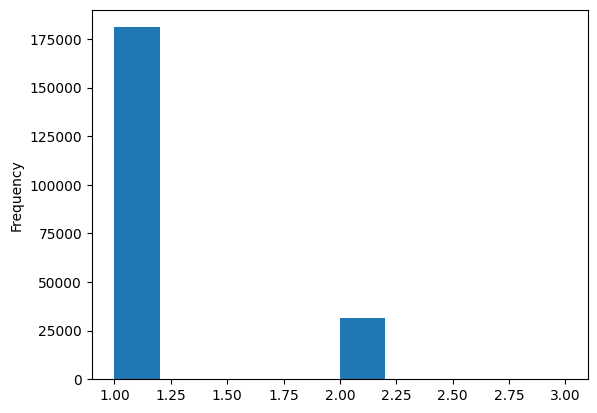

In [185]:
combined_df[combined_df["month"]=='2024-09'][['id','blurb']].id.value_counts().plot(kind='hist')

In [75]:
data.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [77]:
combined_df.isnull().sum()

backers_count                               0
blurb                                     124
category                                    0
converted_pledged_amount                98423
country                                     0
country_displayable_name                    0
created_at                                  0
creator                                     0
currency                                    0
currency_symbol                             0
currency_trailing_code                      0
current_currency                            0
deadline                                    0
disable_communication                       0
fx_rate                                     0
goal                                        0
id                                          0
is_disliked                                 0
is_launched                                 0
is_liked                                    0
is_starrable                                0
launched_at                       

In [79]:
# Define output file path
output_csv_path = "kickstarter_data_2024.csv"

# Save the DataFrame to CSV
combined_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved as: {output_csv_path}")


DataFrame saved as: kickstarter_data_2024.csv


In [231]:
combined_df[combined_df["name"]=="Debut Album"].id.value_counts()

id
632005785     18
1272111298    10
1944698485     9
932573394      9
1352983822     9
383860876      9
1931046387     9
66215956       9
1524591707     9
Name: count, dtype: int64